In [57]:
import pandas as pd
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow import keras
#import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import pathlib
from pathlib import Path

In [18]:
# pip install split-folders tqdm

## Loading Data
- The data was in one folder and needed to be split into sets of train, test and validation data.
- The reason that the data needed to be split is because I need a hold out set that I can test against the model to see if it is valid.
- In order to do this I needed to import splitfolders so that python would take the data, analyze it based on the parameters set and then split it into sperarate folders.

In [19]:
import splitfolders  

## Splitting the Data
- Setting the parameters of how the data needs to be split up.
- Train will get 80% of the data. 
 - This is to train the model.
- Test will get 10% of the data. 
 - This is to test the model.
- Valid will get 10% of the data. 
 - This is to validate the training set.

In [17]:
# splitfolders.ratio("data_1/", output="Data_2", seed=1337, ratio=(.8, .1, .1), group_prefix=None) # default values


Copying files: 0 files [00:00, ? files/s]
Copying files: 109 files [00:00, 1080.15 files/s]
Copying files: 209 files [00:00, 1054.04 files/s]
Copying files: 358 files [00:00, 1154.91 files/s]
Copying files: 514 files [00:00, 1250.42 files/s]
Copying files: 618 files [00:00, 1129.58 files/s]
Copying files: 750 files [00:00, 1180.41 files/s]
Copying files: 920 files [00:00, 1299.43 files/s]
Copying files: 1081 files [00:00, 1376.88 files/s]
Copying files: 1258 files [00:00, 1474.07 files/s]
Copying files: 1408 files [00:01, 1479.99 files/s]
Copying files: 1558 files [00:01, 1425.08 files/s]
Copying files: 1703 files [00:01, 1430.34 files/s]
Copying files: 1847 files [00:01, 1428.19 files/s]
Copying files: 2017 files [00:01, 1499.45 files/s]
Copying files: 2186 files [00:01, 1549.86 files/s]
Copying files: 2389 files [00:01, 1667.94 files/s]
Copying files: 2571 files [00:01, 1654.77 files/s]
Copying files: 2744 files [00:01, 1673.18 files/s]
Copying files: 3003 files [00:01, 1871.32 file

- Just observing what folders are inside the newly created folder, train.

In [20]:
ls data_2/Train

badminton/  baseball/   basketball/ boxing/     cricket/    football/


In [21]:
train_path = 'data_2/train/'
test_path = 'data_2/test/'
valid_path = 'data_2/val/'

In [22]:
# Define some often used standard parameters
batch_size = 16 
img_width = 500
img_height = 500

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rescale = 1./255,
                                shear_range = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)

test_data_gen = ImageDataGenerator(rescale = 1./255)

In [24]:
train = image_gen.flow_from_directory(
      train_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      class_mode='binary',
      batch_size=batch_size
      )
# Shuffle is set to as False so we can later compare it with predicted values without having indexing problem.
test = test_data_gen.flow_from_directory(
      test_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      shuffle=False,  
      class_mode='binary',
      batch_size=batch_size
      )
valid = test_data_gen.flow_from_directory(
      valid_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      class_mode='binary', 
      batch_size=batch_size
      )

Found 3251 images belonging to 6 classes.
Found 410 images belonging to 6 classes.
Found 402 images belonging to 6 classes.


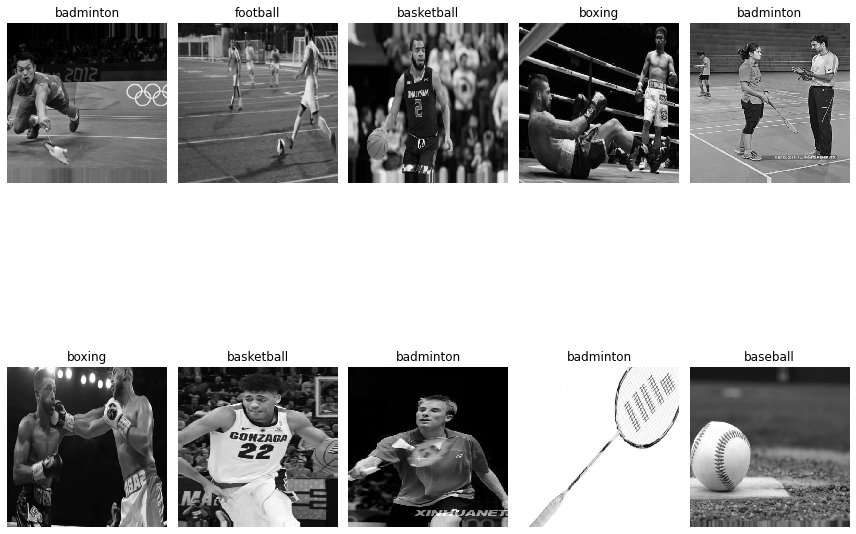

In [25]:
plt.figure(figsize=(12, 12))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in train:
        image = X_batch[0]        
        dic = {0:'badminton', 1:'baseball', 2:'basketball', 3:'boxing', 4:'cricket', 5:'football'}
        plt.title(dic.get(Y_batch[0]))
        plt.axis('off')
        plt.imshow(np.squeeze(image),cmap='gray',interpolation='nearest')
        break
plt.tight_layout()
plt.show()

In [26]:
# Imports that will allow a CNN architecture to be created.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.models import Sequential 
from keras.layers import Activation, Dense 
from keras import initializers 

my_init1 = initializers.TruncatedNormal(mean = 0.0, stddev = 0.05, seed = None)

In [30]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(activation = 'relu', units = 128))#, kernel_initializer = my_init))
model.add(Dense(activation = 'relu', units = 64))
model.add(Dense(activation = 'relu', units = 64)) #kernel_initializer = my_init1))
model.add(Dense(activation = 'relu', units = 32))
model.add(Dense(activation = 'softmax', units = 1))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 498, 498, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 249, 249, 32)     0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1984032)           0         
                                                                 
 dense_15 (Dense)            (None, 128)               253956224 
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                      

In [33]:
model_1 = model.fit_generator(train,
                         steps_per_epoch = 50,
                         epochs = 1,
                         validation_data = valid,
                         validation_steps = len(test)//batch_size)

<ipython-input-33-772e08342d2e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_1 = model.fit_generator(train,


50/50 [==============================] - 74s 1s/step - loss: -177204.2344 - accuracy: 0.1762 - val_loss: -1297083.3750 - val_accuracy: 0.0625


In [36]:
test_a = model.evaluate(test)
print('The testing accuracy is :',test_a[1]*100, '%')

26/26 [==============================] - 6s 227ms/step - loss: -1270959.6250 - accuracy: 0.1659
The testing accuracy is : 16.585366427898407 %


In [50]:
preds1 = model.predict(test,verbose=1)

26/26 [==============================] - 6s 227ms/step


In [51]:
prediction = preds1.copy()
prediction[prediction <= 0.5] = 0
prediction[prediction > 0.5] = 1

<AxesSubplot:>

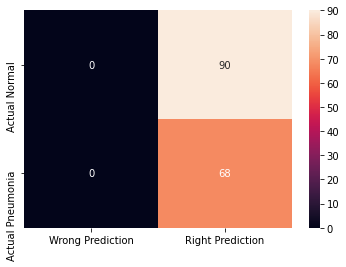

In [52]:
from sklearn.metrics import classification_report,confusion_matrix
cm1 = pd.DataFrame(data=confusion_matrix(test.classes, prediction, labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Wrong Prediction", "Right Prediction"])
import seaborn as sns
sns.heatmap(cm1,annot=True, fmt="d")

In [53]:
print(classification_report(y_true=test.classes,y_pred=prediction,target_names =['badminton', 'baseball', 'basketball', 'boxing', 'cricket', 'football']))

              precision    recall  f1-score   support

   badminton       0.00      0.00      0.00        90
    baseball       0.17      1.00      0.28        68
  basketball       0.00      0.00      0.00        46
      boxing       0.00      0.00      0.00        68
     cricket       0.00      0.00      0.00        65
    football       0.00      0.00      0.00        73

    accuracy                           0.17       410
   macro avg       0.03      0.17      0.05       410
weighted avg       0.03      0.17      0.05       410



/Users/patrickryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/patrickryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/patrickryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

### Important things to think about before starting to build a CNN model:
1. Always begin with a lower filter value such as 32 and begin to increase it layer wise. The patterns get nore conplex so more filters are needed to capture as many combinations as possible.
2. Construct the model with a layer of Conv2D followed by a layer of MaxPooling.
3. The kernel_size is a preferred odd number like 3x3.
4. Tanh, relu, etc. can be used for an activation function, but relu is the most preferred choice.
5. (input_shape) takes three arguments, the images width & height and dimension as color channel.
6. Flatten the input after the CNN layers and then add ANN layers.
7. Use the activation function as softmax for the last layer. If the problem is more than 2 classes, define units as the total number of classes and use sigmoid for binary classification and set unit to 1.

In [45]:
cnn = Sequential()
# Starting out with a lower filter of 32.
# Max Pooling simply says to the Convolutional Neural Network that we will carry forward only that information,
# if that is the largest information available amplitude.
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
# Increasing the filter to 64.
cnn.add(Conv2D(64, (3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
# Flattening is converting the data into a 1-dimensional array for inputting it to the next layer. 
# We flatten the output of the convolutional layers to create a single long feature vector.
cnn.add(Flatten())
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(activation = 'relu', units = 33)) #kernel_initializer = my_init1))
cnn.add(Dense(activation = 'relu', units = 32))
cnn.add(Dense(activation = 'softmax', units = 1))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## CNN Summary
- Now that we have developed the model let's see what is going on!

In [46]:
cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 498, 498, 32)      320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 249, 249, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 247, 247, 32)      9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 123, 123, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 121, 121, 32)      9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 60, 60, 32)      

## Interpretation of the Model
- Plotting CNN architecture.

In [47]:
# Hyperparameters of Conv2D
Conv2D(filters=2, kernel_size=1,
    strides=(1, 1),
    padding="valid",
    activation=None,
    input_shape=(img_height, img_width, 3)
    )
# Hyperparameters of MaxPooling2D 
MaxPooling2D(
    pool_size=(2, 2), strides=None, padding="valid"
    )

## Visualizing the Model
- Link for code and model found <a href=https://towardsdatascience.com/medical-x-ray-%EF%B8%8F-image-classification-using-convolutional-neural-network-9a6d33b1c2a>in this blog</a>.

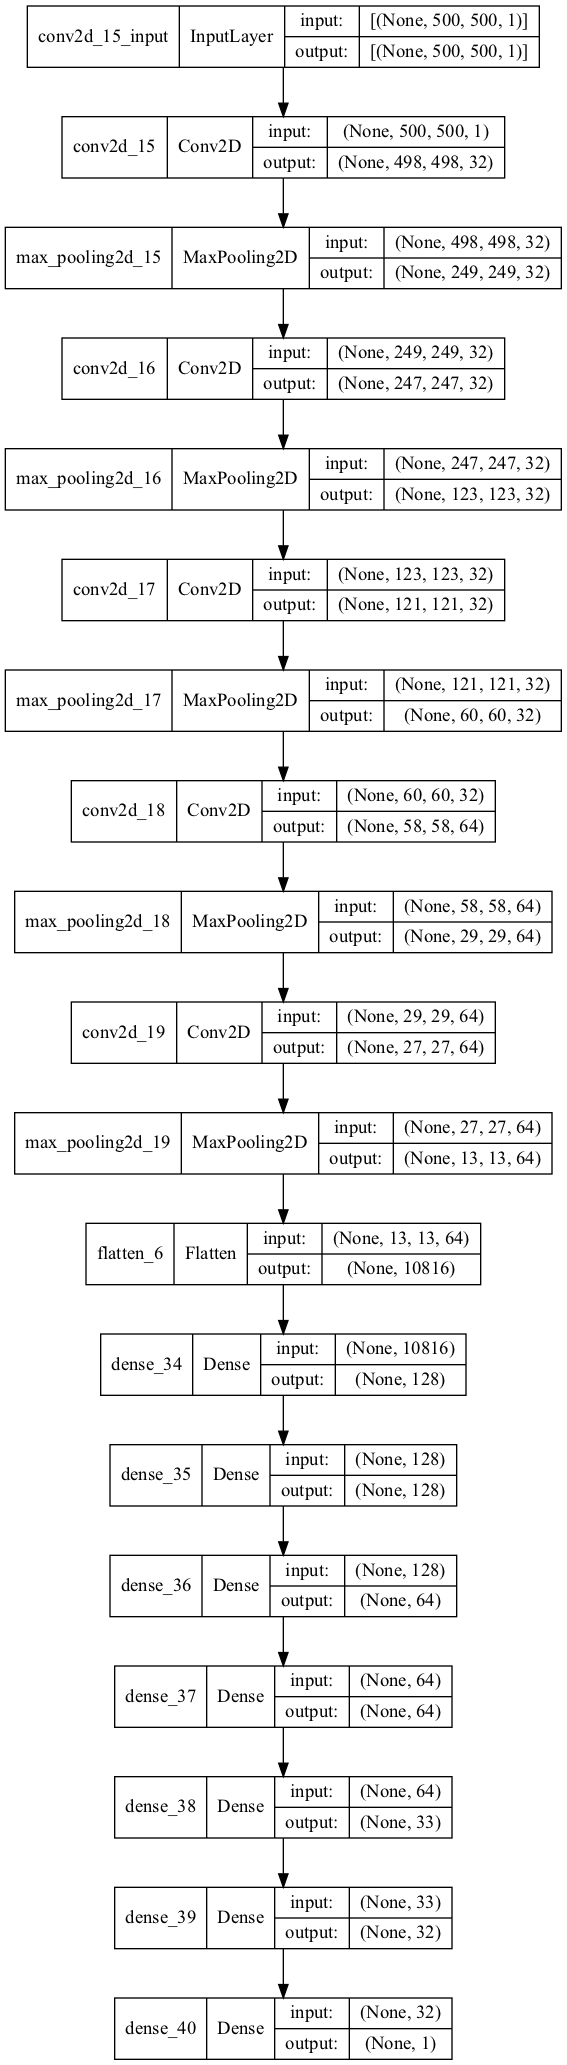

In [48]:
!pip install pydot
import graphviz
from tensorflow.keras.utils import plot_model
plot_model(cnn,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

## Fitting the Model
- EarlyStopping is called to stop the epochs based on some metric (monitor) and conditions (mode, patience).
- It helps to avoid overfitting the model.
- We are telling the model to stop based on val_loss metric, we need it to be a minimum.
- (patience) says that after a minimum val_loss is achieved during the next iterations if the val_loss increases in any of the 3 iterations then the the training will stop at that epoch.

In [49]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [early, learning_rate_reduction]

## Assigning Class Weights
- It is good practice to assign class weights.
- It emphasizes the weight of the minority class in order for the model to learn from all classes equally.

In [50]:
train.classes

array([0, 0, 0, ..., 5, 5, 5], dtype=int32)

In [51]:
train

In [52]:
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight('balanced', classes=np.unique(train.classes), y=train.classes)
cw = dict(zip(np.unique(train.classes), weights))
print(cw)

{0: 0.7696496212121212, 1: 0.9780385078219013, 2: 1.492653810835629, 3: 1.0108830845771144, 4: 1.0708168642951252, 5: 0.921485260770975}


In [53]:
cnn_model = cnn.fit_generator(train,
                         steps_per_epoch = 100,
                         epochs = 1,
                         callbacks=[early, learning_rate_reduction],
                         validation_data = valid,
                         validation_steps = 624,
                         class_weight=cw)

<ipython-input-53-de0ae8c502dc>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model = cnn.fit_generator(train,


100/100 [==============================] - 156s 2s/step - loss: -1862224183296.0000 - accuracy: 0.1607 - val_loss: -35389465165824.0000 - val_accuracy: 0.1692 - lr: 0.0010


## Defining the Results of the Visualization Function

In [54]:
# Defining results from a visualization function.
def visualize_training_results(history):
    '''
    From https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
    
    Input: keras history object (output from trained model)
    '''
    fig, (ax1, ax2) = plt.subplots(2, sharex=True)
    fig.suptitle('Model Results')

    # summarize history for accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_ylabel('Accuracy')
    ax1.legend(['train', 'test'], loc='upper left')
    # summarize history for loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_ylabel('Loss')
    ax2.legend(['train', 'test'], loc='upper left')
    
    plt.xlabel('Epoch')
    plt.show()

Test loss: -34702905835520.0
Test accuracy: 0.16585366427898407


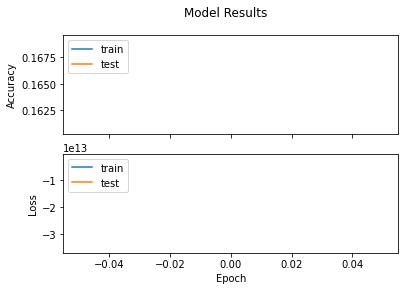

In [55]:
# test_accu = cnn.evaluate_generator(test, 100)
# test_accu = cnn.evaluate(test, len(valid), verbose=0)
test_accu = cnn.evaluate(test, verbose=0)
print("Test loss:", test_accu[0])
print("Test accuracy:", test_accu[1])

visualize_training_results(cnn_model)

## Evaluate
- Find the models accuracy.
- Predicting the test dataset.
- Taking a peak at some of the performance measurement metrics in detail to evaluate our model.

In [56]:
test_accu = cnn.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '%')

26/26 [==============================] - 9s 336ms/step - loss: -34702905835520.0000 - accuracy: 0.1659
The testing accuracy is : 16.585366427898407 %


In [79]:
preds = cnn.predict(test,verbose=1)

26/26 [==============================] - 11s 413ms/step


- The activation function of the last layer is sigmoid.
- This allows the model to give a prediction in the 0 to 1 range and not an exact classification as 0 or 1.
- So we categorize all the values in the 0.5 to 1 range as 0 and less than 0.5 as 1.
- Note: 0 denotes a normal case and 1 denotes a case of pneumonia.

In [80]:
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

<AxesSubplot:>

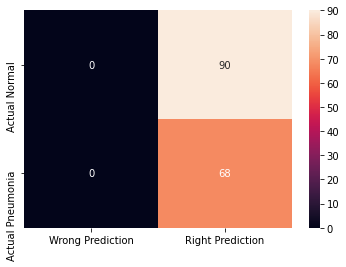

In [82]:
from sklearn.metrics import classification_report,confusion_matrix
cm1 = pd.DataFrame(data=confusion_matrix(test.classes, prediction, labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Wrong Prediction", "Right Prediction"])
import seaborn as sns
sns.heatmap(cm1,annot=True, fmt="d")

In [83]:
# This code extracts the images from the test data iterator without shuffling the sequence.
# x contains image array and y has labels 
test.reset()
x=np.concatenate([test.next()[0] for i in range(test.__len__())])
y=np.concatenate([test.next()[1] for i in range(test.__len__())])
print(x.shape)
print(y.shape)

(410, 500, 500, 1)
(410,)


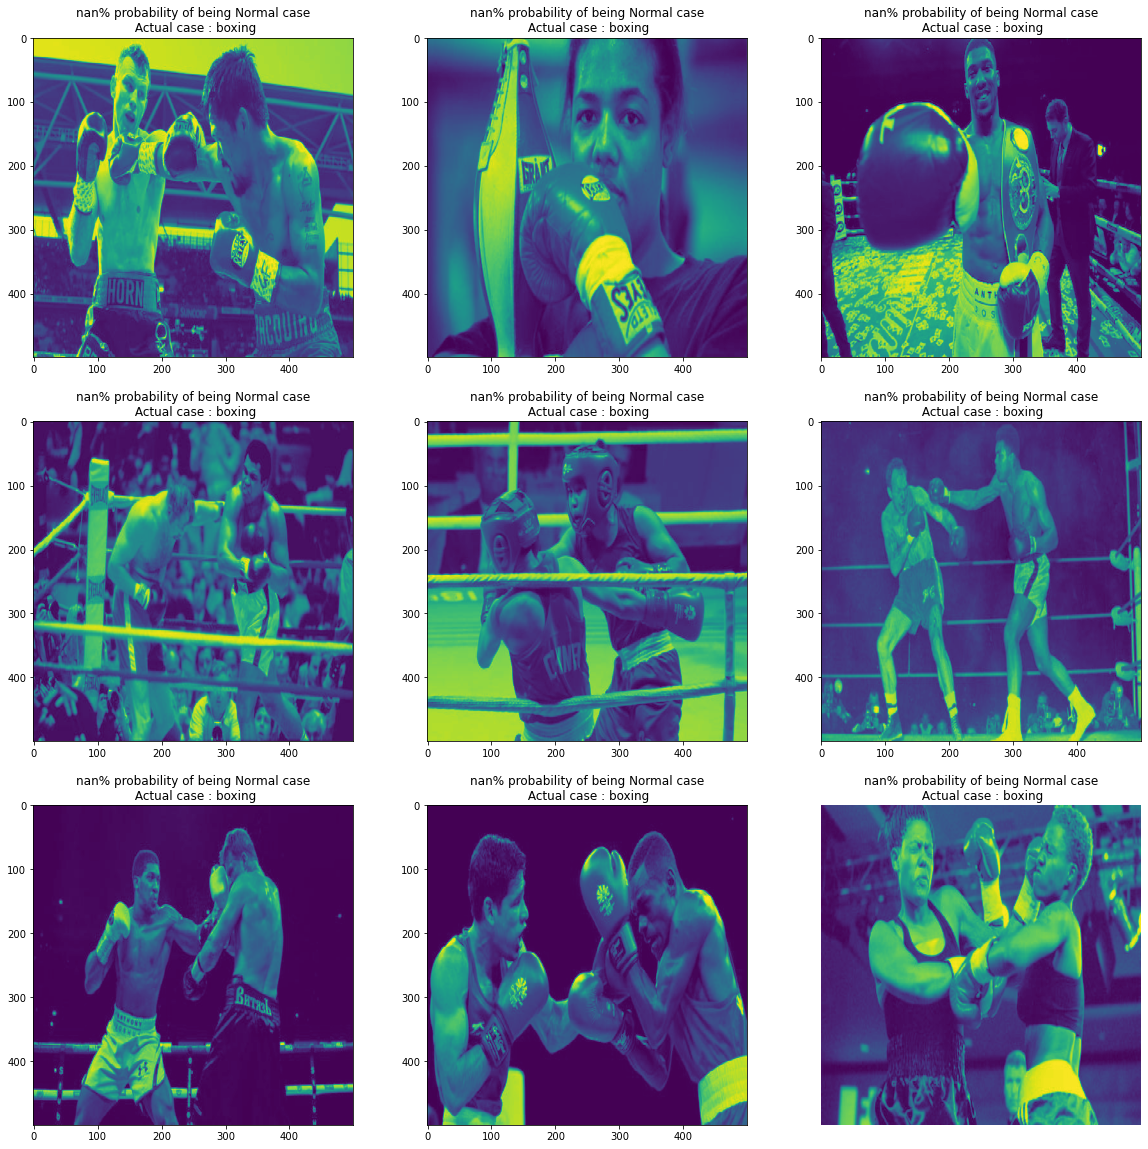

In [85]:
dic = {0:'badminton', 1:'baseball', 2:'basketball', 3:'boxing', 4:'cricket', 5:'football'}
plt.figure(figsize=(20,20))
for i in range(0+228, 9+228):
    plt.subplot(3, 3, (i-228)+1)
    if preds[i, 0] >= 0.5: 
        out = ('{:.2%} probability of being Pneumonia case'.format(preds[i][0]))
    else: 
        out = ('{:.2%} probability of being Normal case'.format(1-preds[i][0]))
    plt.title(out+"\n Actual case : "+ dic.get(y[i]))    
    plt.imshow(np.squeeze(x[i]))
plt.axis('off')
plt.show()